### Question 1 - [70 marks]
#### Dataset sourced from Kaggle Competitions
URL - https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

### About DataSet
#### Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

#### Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

#### Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.



### Importing Dataset from Kaggle

In [ ]:
#Importing Dataset

%pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package'
od.download(url)

100%|██████████| 3.83M/3.83M [00:00<00:00, 113MB/s]

In [ ]:
import os
data = './weather-dataset-rattle-package'
os.listdir(data)

['weatherAUS.csv']

In [ ]:
train_csv = data + '/weatherAUS.csv'
train_csv

'./weather-dataset-rattle-package/weatherAUS.csv'

### Importing required Libraries

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
df = pd.read_csv(train_csv)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. ```RainTomorrow``` is our target variable for rain prediction.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.dropna(subset=['RainToday','RainTomorrow'], inplace=True)

### EDA

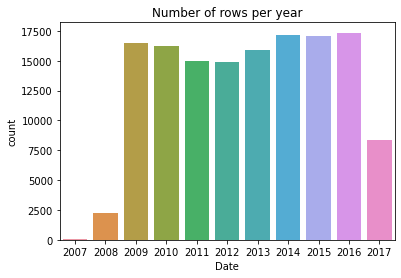

In [ ]:
plt.title('Number of rows per year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

In [ ]:
df.Location.nunique()

49

In [ ]:
px.histogram(df, x='Location', title="Rainfall based on Location", color='RainToday')

In [ ]:
px.histogram(df, x='Temp3pm', title="Temperature(3pm) vs RainTomorrow", color='RainTomorrow')

Based on the above visualization above it is more likely to rain if the temperature is between 18-26 degree celcius.

In [ ]:
px.histogram(df, x='RainTomorrow', title="RainTomorrow based on RainToday", color='RainToday')

From the above visualization it depicts a class imbalance in the amount of rain held. At the same time if there was no rain today then there are higher chances of not having rain tomorrow.

In [ ]:
px.scatter(df.sample(5000), title='Temperature Trend (MaxTemp vs MinTemp',
                        x='MinTemp',
                        y='MaxTemp',
                        color='RainToday')

There is a linear correlation between the MaxTemp and the MinTemp. The variation in the temperature is small when it rains on a particular day.

In [ ]:
px.histogram(df, x='Humidity3pm', y = 'Temp3pm', title="Temperature vs Humidity", color='RainTomorrow')

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Train Test Split and Model

In [ ]:
#TestTrainSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#Tree
from sklearn.tree import DecisionTreeClassifier
# Ensembling Techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier 

#Scores & Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,classification_report,confusion_matrix

In [ ]:
df.shape

(140787, 23)

In [ ]:
X = df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]
y = df['RainTomorrow']

In [ ]:
n_cols = X.select_dtypes(include=np.number).columns.to_list()
c_cols = X.select_dtypes('object').columns.to_list()

In [ ]:
n_cols, c_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

### Imputing Nulls with mean using SimpleImputer

In [ ]:
#Simple Imputer - Imputes the missing values in the dataset with mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [ ]:
#Missing Values in each column
df[n_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [ ]:
imputer.fit(df[n_cols])
df[n_cols]=imputer.transform(df[n_cols])

In [ ]:
#Missing Values in each column
df[n_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### MinMax Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[n_cols])
df[n_cols]=scaler.transform(df[n_cols])

In [ ]:
df[n_cols].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        0.487850       0.529964       0.006334       0.037741   
std         0.150784       0.134343       0.022817       0.021926   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.379717       0.429112       0.000000       0.027586   
50%         0.483491       0.519849       0.000000       0.037741   
75%         0.596698       0.623819       0.002156       0.037741   
max         1.000000       1.000000       1.000000       1.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        0.526244       0.263337       0.107619       0.214151   
std         0.189061       0.101797       0.068099       0.100214   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.526244       0.193798       0.053846       0.149425   
50%         0.526244       0.255814       0.100000       0.214151   
75%         0.600000       0.310078       0.146154       0.275862   
max         1.000000       1.000000       1.000000       1.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean        0.688268       0.514493       0.614125       0.610527   
std         0.189607       0.205470       0.111557       0.106920   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.570000       0.370000       0.545455       0.542400   
50%         0.700000       0.514493       0.614125       0.610527   
75%         0.830000       0.650000       0.682645       0.676800   
max         1.000000       1.000000       1.000000       1.000000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  140787.000000  140787.000000  140787.000000  140787.000000  
mean        0.492351       0.499917       0.510276       0.520023  
std         0.253806       0.234384       0.136727       0.131916  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.333333       0.444444       0.411392       0.424184  
50%         0.492351       0.499917       0.506329       0.512476  
75%         0.666667       0.666667       0.605485       0.608445  
max         1.000000       1.000000       1.000000       1.000000

### OneHot Encoding for Categorical Columns

In [ ]:
df[c_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit_transform(df[c_cols])

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
df[c_cols]

Location WindGustDir WindDir9am WindDir3pm RainToday
0        Albury           W          W        WNW        No
1        Albury         WNW        NNW        WSW        No
2        Albury         WSW          W        WSW        No
3        Albury          NE         SE          E        No
4        Albury           W        ENE         NW        No
...         ...         ...        ...        ...       ...
145454    Uluru           E        ESE          E        No
145455    Uluru           E         SE        ENE        No
145456    Uluru         NNW         SE          N        No
145457    Uluru           N         SE        WNW        No
145458    Uluru          SE        SSE          N        No

[140787 rows x 5 columns]

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(c_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
df[encoded_cols] = encoder.transform(df[c_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
df

Date Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury  0.516509  0.523629  0.001617     0.037741   
1       2008-12-02   Albury  0.375000  0.565217  0.000000     0.037741   
2       2008-12-03   Albury  0.504717  0.576560  0.000000     0.037741   
3       2008-12-04   Albury  0.417453  0.620038  0.000000     0.037741   
4       2008-12-05   Albury  0.613208  0.701323  0.002695     0.037741   
...            ...      ...       ...       ...       ...          ...   
145454  2017-06-20    Uluru  0.283019  0.502836  0.000000     0.037741   
145455  2017-06-21    Uluru  0.266509  0.533081  0.000000     0.037741   
145456  2017-06-22    Uluru  0.285377  0.568998  0.000000     0.037741   
145457  2017-06-23    Uluru  0.327830  0.599244  0.000000     0.037741   
145458  2017-06-24    Uluru  0.384434  0.601134  0.000000     0.037741   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindDir3pm_SE  \
0       0.526244           W       0.294574          W  ...           0.0   
1       0.526244         WNW       0.294574        NNW  ...           0.0   
2       0.526244         WSW       0.310078          W  ...           0.0   
3       0.526244          NE       0.139535         SE  ...           0.0   
4       0.526244           W       0.271318        ENE  ...           0.0   
...          ...         ...            ...        ...  ...           ...   
145454  0.526244           E       0.193798        ESE  ...           0.0   
145455  0.526244           E       0.193798         SE  ...           0.0   
145456  0.526244         NNW       0.124031         SE  ...           0.0   
145457  0.526244           N       0.240310         SE  ...           0.0   
145458  0.526244          SE       0.170543        SSE  ...           0.0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                  0.0             0.0            0.0           0.0   
1                  0.0             0.0            0.0           0.0   
2                  0.0             0.0            0.0           0.0   
3                  0.0             0.0            0.0           0.0   
4                  0.0             0.0            0.0           0.0   
...                ...             ...            ...           ...   
145454             0.0             0.0            0.0           0.0   
145455             0.0             0.0            0.0           0.0   
145456             0.0             0.0            0.0           0.0   
145457             0.0             0.0            0.0           0.0   
145458             0.0             0.0            0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  \
0                  1.0             0.0             0.0           1.0   
1                  0.0             1.0             0.0           1.0   
2                  0.0             1.0             0.0           1.0   
3                  0.0             0.0             0.0           1.0   
4                  0.0             0.0             0.0           1.0   
...                ...             ...             ...           ...   
145454             0.0             0.0             0.0           1.0   
145455             0.0             0.0             0.0           1.0   
145456             0.0             0.0             0.0           1.0   
145457             1.0             0.0             0.0           1.0   
145458             0.0             0.0             0.0           1.0   

        RainToday_Yes  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
145454            0.0  
145455            0.0  
145456            0.0  
145457            0.0  
145458            0.0  

[140787 rows x 125 columns]

In [ ]:
# %pip install pyarrow
df.to_parquet('./data/data_preprocessed.parquet')

In [ ]:
X = df[n_cols + encoded_cols]
y = df['RainTomorrow']

In [ ]:
X

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   
...          ...       ...       ...          ...       ...            ...   
145454  0.283019  0.502836  0.000000     0.037741  0.526244       0.193798   
145455  0.266509  0.533081  0.000000     0.037741  0.526244       0.193798   
145456  0.285377  0.568998  0.000000     0.037741  0.526244       0.124031   
145457  0.327830  0.599244  0.000000     0.037741  0.526244       0.240310   
145458  0.384434  0.601134  0.000000     0.037741  0.526244       0.170543   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.153846      0.275862         0.71         0.22  ...   
1           0.030769      0.252874         0.44         0.25  ...   
2           0.146154      0.298851         0.38         0.30  ...   
3           0.084615      0.103448         0.45         0.16  ...   
4           0.053846      0.229885         0.82         0.33  ...   
...              ...           ...          ...          ...  ...   
145454      0.115385      0.149425         0.59         0.27  ...   
145455      0.100000      0.126437         0.51         0.24  ...   
145456      0.100000      0.103448         0.56         0.21  ...   
145457      0.069231      0.103448         0.53         0.24  ...   
145458      0.100000      0.080460         0.51         0.24  ...   

        WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
0                 0.0             0.0             0.0            0.0   
1                 0.0             0.0             0.0            0.0   
2                 0.0             0.0             0.0            0.0   
3                 0.0             0.0             0.0            0.0   
4                 0.0             0.0             0.0            0.0   
...               ...             ...             ...            ...   
145454            0.0             0.0             0.0            0.0   
145455            0.0             0.0             0.0            0.0   
145456            0.0             0.0             0.0            0.0   
145457            0.0             0.0             0.0            0.0   
145458            0.0             0.0             0.0            0.0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  \
0                0.0             1.0             0.0             0.0   
1                0.0             0.0             1.0             0.0   
2                0.0             0.0             1.0             0.0   
3                0.0             0.0             0.0             0.0   
4                0.0             0.0             0.0             0.0   
...              ...             ...             ...             ...   
145454           0.0             0.0             0.0             0.0   
145455           0.0             0.0             0.0             0.0   
145456           0.0             0.0             0.0             0.0   
145457           0.0             1.0             0.0             0.0   
145458           0.0             0.0             0.0             0.0   

        RainToday_No  RainToday_Yes  
0                1.0            0.0  
1                1.0            0.0  
2                1.0            0.0  
3                1.0            0.0  
4                1.0            0.0  
...              ...            ...  
145454           1.0            0.0  
145455           1.0            0.0  
145456           1.0            0.0  
145457           1.0            0.0  
145458           1.0            0.0  

[140787 rows x 118 columns]

### Dimensionality Reduction

In [ ]:
#PCA

# define a matrix
from sklearn.decomposition import PCA
# create the PCA instance
pca = PCA(n_components=0.99)
x = pca.fit_transform(X)
# x.shape
# fit on data
# pca.fit(X)
# access values and vectors
PCAs=pca.components_
df=pd.DataFrame(PCAs)
df_pca=df.T  # transpose the dataframe 
# df_pca.columns=['pca1','pca]
# df_pca.head()

In [ ]:
#Variance explained by each component
print(pca.explained_variance_)
pca.n_components_

[0.38703154 0.14734108 0.12826465 0.12015571 0.10779154 0.10222427
 0.09814626 0.08984849 0.0856774  0.08106703 0.07670428 0.07437875
 0.07078256 0.06887606 0.06719474 0.06580342 0.0654719  0.0641299
 0.06303318 0.06213877 0.06170744 0.06054318 0.05938482 0.05886152
 0.05840551 0.05798709 0.05651029 0.05584973 0.05526501 0.05500485
 0.05358268 0.05345703 0.0529116  0.05282249 0.05141677 0.05075858
 0.05023044 0.04795003 0.04775137 0.04662294 0.04526077 0.04453771
 0.0426511  0.04002712 0.03881786 0.03574737 0.03410818 0.03097085
 0.03003865 0.02712872 0.02602773 0.02369996 0.02338066 0.02283776
 0.02259152 0.02227801 0.02181538 0.02165349 0.02154337 0.02143288
 0.02136208 0.02133038 0.02125994 0.0211584  0.02115341 0.02106657
 0.02101901 0.02098419 0.02091795 0.02088414 0.02083443 0.02073949
 0.02068921 0.02063281 0.02054781 0.02051729 0.02041177 0.02035321
 0.02024218 0.01993407 0.01975942 0.01961718 0.01944501 0.01913493
 0.0189883  0.01883167 0.01844847 0.01827655 0.01814865 0.01698

101

In [ ]:
ratio_var=pca.explained_variance_/sum(pca.explained_variance_)
X=np.dot(X, df_pca)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# # HyperParam Tuning using RandomSearchCV
# import time
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
# # Decision Tree
# start = time.process_time()
# dt_tune = DecisionTreeClassifier()
# rv_params = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : [3, 5, 7, 10],
#     'min_samples_split' : range(2, 10, 1),
#     'min_samples_leaf' : range(2, 10, 1)
# }

# rs_search = RandomizedSearchCV(dt_tune, rv_params, cv = 10, n_jobs = -1, verbose = 1)
# rs_search.fit(X_train, y_train)
# print(time.process_time() - start)

# # best parameters and best score

# print(rs_search.best_params_)
# print(rs_search.best_score_)

In [ ]:
# start = time.process_time()
# #RandomForest Classifier
# rand_clf = RandomForestClassifier(n_jobs=-1)

# rand_params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               
#              'min_samples_leaf': [1, 2, 3, 4, 5],
#              'min_samples_split': [2, 5, 7, 9, 11],
#              'max_features': ['auto', 'sqrt'],
#              'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
#              'class_weight':[{0:0.246667, 1:0.75333},None]
#               }


    
# rand_rs = RandomizedSearchCV(rand_clf, rand_params, cv=10, n_jobs = -1, random_state=42)
# rand_rs.fit(X_train, y_train)

# print(time.process_time() - start)
# print(rand_rs.best_params_)
# print(rand_rs.best_score_)

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tsize = [0.2,0.3,0.4,0.5,0.6,0.7]
tsize_acc = {}
for i in tsize:
    acc = []
    for j in range(100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i,random_state=j) 
        model_lr=LogisticRegression() # create the model
        dt = model_lr.fit(X_train,y_train)  # fit the model to trainset
        YPred = dt.predict(X_test)   # predict the output variable in the testset
        accuracy = accuracy_score(y_test,YPred)
        report = classification_report(YPred, y_test)
        cm = confusion_matrix(y_test, YPred)
    tsize_acc.update({i:accuracy})
print(tsize_acc)
print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

{0.2: 0.7879776434356108, 0.3: 0.7873828932960214, 0.4: 0.7883630473713628, 0.5: 0.7886956363039075, 0.6: 0.7878011315245164, 0.7: 0.7878191381883836}
Classification report:
Accuracy:  0.7878191381883836
              precision    recall  f1-score   support

          No       0.79      0.79      0.79     76648
         Yes       0.79      0.79      0.79     76773

    accuracy                           0.79    153421
   macro avg       0.79      0.79      0.79    153421
weighted avg       0.79      0.79      0.79    153421

Confusion matrix:
[[60399 16304]
 [16249 60469]]


### Stacking Models

In [ ]:
def get_stacking():
	# define the base models: level0 models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('cart', RandomForestClassifier(n_estimators=450, criterion='entropy')))
	level0.append(('svm', SVC(kernel='rbf')))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model: level 1
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
	return model

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['lr']=LogisticRegression()
  models['bayes'] = GaussianNB()
  models['svc_lr']=SVC(kernel='linear')
  models['svm_polly'] = SVC(kernel='poly')
  models['svm_rbf'] = SVC(kernel='rbf')
  models['svm_sigmoid'] = SVC(kernel='sigmoid')

  models['dt_ent'] = DecisionTreeClassifier(min_samples_split= 4, min_samples_leaf= 2, max_depth= 10, criterion='entropy')
  models['dt_gini'] = DecisionTreeClassifier(min_samples_split= 4, min_samples_leaf= 2, max_depth= 10, criterion='gini')
  models['rf'] = RandomForestClassifier(n_estimators=450, criterion='entropy')
  models['bagg_dt'] = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=450)
  models['bagg_svc'] = BaggingClassifier(base_estimator=SVC(), n_estimators=450)
  models['bagg_nb'] = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=450)
  models['adaboost'] = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=450)
  models['stacking']= get_stacking()
  return models


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, classification_report
def evaluate_multi_model(model, X, y):
  mc=10
  acc = [] ### Blank vector
  f = []
  prec = []
  rec = []
  # c_report = []
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)# split dataset
    classifier = model.fit(X_train,y_train) # fit the model
    YPred = classifier.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    f1 = f1_score(y_test, YPred, average='weighted')
    precision = precision_score(y_test, YPred, average='weighted')
    recall = recall_score(y_test, YPred, average='weighted')
    report = classification_report(YPred, y_test)
    acc.append(a) # append accuracy
    f.append(f1)
    prec.append(precision)
    rec.append(recall)
    # c_report.append(report)
    return np.mean(acc), classifier, np.mean(recall), np.mean(prec),np.mean(f)

In [ ]:
def evaluate_model_cross(model, X, y):
	cv = 10
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
	return scores

In [ ]:
from numpy import mean, std
import pickle
import warnings
warnings.filterwarnings("ignore")
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores, mod, prec, recall,fscore = evaluate_multi_model(model,X,y)#, X, y)
	results.append(scores)
	names.append(name)
	filename = './models/'+name+'.pkl'
	pickle.dump(mod, open(filename, 'wb'))
	print(name,'-- accuracy:', mean(scores), '-- Precision ', mean(prec),'-- Recall', mean(recall),'-- Fscore:', mean(fscore))

lr -- accuracy: 0.7890498460134595 -- Precision  0.7890498460134595 -- Recall 0.789048416036624 -- Fscore: 0.7890488743644324
bayes -- accuracy: 0.7220714041291205 -- Precision  0.7220714041291205 -- Recall 0.7261102675658536 -- Fscore: 0.7205915214201426
svc_lr -- accuracy: 0.7908520588570777 -- Precision  0.7908520588570777 -- Recall 0.7908599958600991 -- Fscore: 0.7908414780113924
svm_polly -- accuracy: 0.8584464469031595 -- Precision  0.8584464469031595 -- Recall 0.8585481662352208 -- Fscore: 0.8584247090824259
svm_rbf -- accuracy: 0.8721569522071404 -- Precision  0.8721569522071404 -- Recall 0.8722719249382744 -- Fscore: 0.8721562614644329


In [ ]:
from numpy import mean, std
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model_cross(model, X, y)
	results.append(scores)
	names.append(name)
	filename = 'Models/'+name+'_cv.pkl'
	pickle.dump(model, open(filename, 'wb'))
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()